# Transformers in Computer Vision with Python, PyTorch, and Hugging Face

This tutorial will guide you through the process of utilizing Transformers in Computer Vision using Python, PyTorch, and Hugging Face. Transformers, originally designed for natural language processing tasks, have shown remarkable success in the field of computer vision as well. We'll explore how to apply these models to image-related tasks.

## Prerequisites
Before we begin, ensure you have a Google Colab account to run this tutorial and a basic understanding of Python and neural networks.

## Setting Up the Environment
First, we need to install necessary packages. Open a new Google Colab notebook and execute the following commands:

In [3]:
!pip install -q torch torchvision torchaudio
!pip install -q transformers

After installation, check the versions of the key packages:

In [4]:
import torch
import torchvision
import transformers

print(f"PyTorch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")
print(f"Transformers Version: {transformers.__version__}")

PyTorch Version: 2.1.0+cu121
Torchvision Version: 0.16.0+cu121
Transformers Version: 4.35.2


## Understanding Transformers in Vision
Transformers, primarily known for their success in NLP, leverage self-attention mechanisms to capture global dependencies. Vision Transformers (ViTs) adapt this concept to image analysis.

## How ViTs Work


1.   Image Tokenization: An image is divided into fixed-size patches and linearly  embedded.
2.   Positional Encoding: Similar to NLP, positional encodings are added to retain positional information.

3. Transformer Encoder: The sequence of image patches (now tokens) is processed through standard Transformer encoders.

4. Classification Head: Finally, a classifier is attached at the end for tasks like image classification.

## Implementing a Vision Transformer
We'll use Hugging Face's Transformers library, which provides an extensive collection of pre-trained models.

Loading a Pre-Trained ViT

Files already downloaded and verified


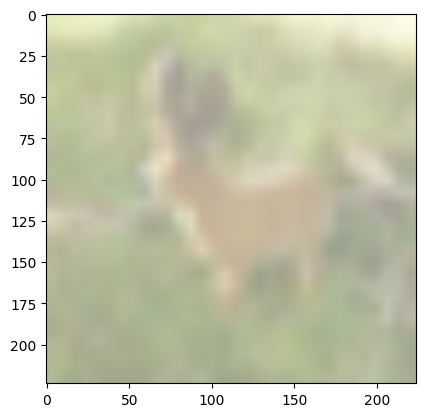

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.Resize((224, 224)),  # Resize the image to 224x224 for the ViT model
     transforms.ToTensor()])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

dataiter = iter(trainloader)
images, labels = next(dataiter)
image = images[0]

import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(image)

In [46]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import requests
from PIL import Image

# Initialize feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', output_attentions=True)

# Prepare image for the model
inputs = feature_extractor(images=image, return_tensors="pt")

# Predict
outputs = model(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
top5_preds = torch.topk(predictions, 5).indices.squeeze(0).tolist()

# Map predictions to labels
for id in top5_preds:
    print("Label:", model.config.id2label[id], "with score", predictions[0, id].item())

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Label: matchstick with score 0.030600925907492638
Label: nematode, nematode worm, roundworm with score 0.02780633233487606
Label: bassoon with score 0.013641556724905968
Label: oboe, hautboy, hautbois with score 0.01354977861046791
Label: revolver, six-gun, six-shooter with score 0.012026757933199406


## Visualizing the Process
To better understand the internals of a ViT, we can visualize the attention maps.

attention_weights shape: torch.Size([1, 12, 197, 197])


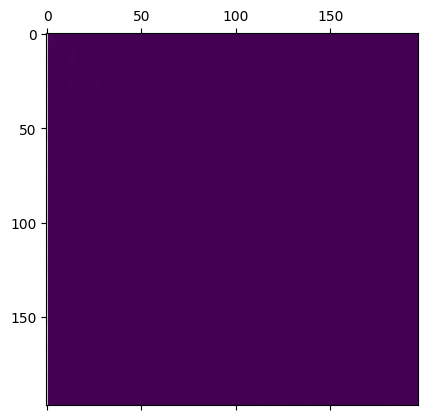

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Get attention weights of first
attention_weights = outputs['attentions'][0]
print(f'attention_weights shape: {attention_weights.shape}')

# Plot attention map
def plot_attention_map(attention_map, num_patches, image):
    # Reshape and plot
    attention_map = attention_map.reshape((num_patches, num_patches))
    plt.matshow(attention_map)
    plt.show()

plot_attention_map(attention_weights[0, 0].detach().numpy(), attention_weights.shape[2], image) # Assuming 14x14 patches


## Conclusion and Reproducibility
In this tutorial, we explored the application of Transformers in computer vision using PyTorch and Hugging Face's Transformers library. The key takeaway is the adaptability of Transformer architectures to various domains, including vision.